# Cluster Identification and Local/Neighborhood Structure Preservation 
We need to identify cell type clusters in each dataset and analyze their dynamics across multiple DRs.  
Here, we will use the __entire gene-space__ of each scRNA-seq dataset to determine ground-truth clusters and assign cell type IDs:
* 100 PCs on all genes
* Phenograph clustering using Louvain algorithm
* t-SNE on 100 PCs to visualize ground-truth clusters

In [1]:
import sys
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

FIt-SNE repository not detected. Functionality will be disabled.


---
To benchmark dimensionality reduction techniques, we are using two datasets:
* From [__Macosko, *et al* (2015)__](https://www.ncbi.nlm.nih.gov/pubmed/26000488), the mouse retina scRNA-seq data generated using DropSeq: [GSM1626793](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1626793)
* From [__Herring, *et al* (2018)__](https://www.ncbi.nlm.nih.gov/pubmed/29153838), the WT mouse colon scRNA-seq data generated using inDrops: [GSM2743164](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM2743164)  
  
The first set should be highly __discrete__, containing highly separable cell populations, where the latter should be __continuous__, representing a continuum of branching cell states in the gut epithelium.

In [3]:
import phenograph

In [2]:
retina = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.digital_expression_filtered_CH.tsv.gz')
colon = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq_filtered_CH.tsv.gz')

In [12]:
retina.data.shape

(1326, 20478)

In [13]:
colon.data.shape

(1117, 25505)

In [14]:
# perform 100-component PCA on both datasets to prime tSNE and clustering
retina_PCA100 = fcc_PCA(retina.arcsinh_norm(), n_components=100)
colon_PCA100 = fcc_PCA(colon.arcsinh_norm(), n_components=100)

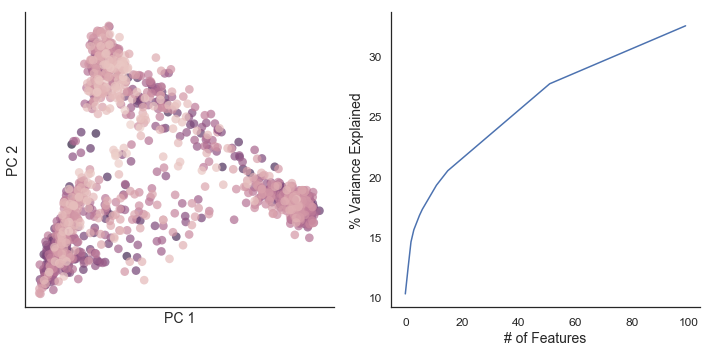

In [15]:
retina_PCA100.plot_PCA()

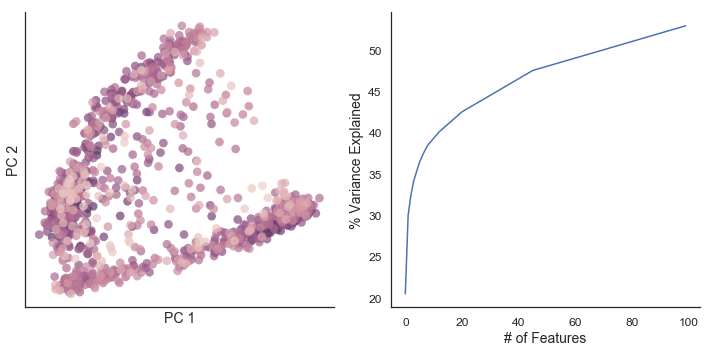

In [16]:
colon_PCA100.plot_PCA()

In [61]:
# perform phenograph clustering on 100 PCs of each dataset
retina_clu, retina_graph, retina_Q = phenograph.cluster(retina_PCA100.results, k=30)
colon_clu, colon_graph, colon_Q = phenograph.cluster(colon_PCA100.results, k=100)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.10949182510375977 seconds
Jaccard graph constructed in 0.4046201705932617 seconds
Wrote graph to binary file in 0.2519047260284424 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.809177
Louvain completed 21 runs in 0.48018383979797363 seconds
PhenoGraph complete in 1.2598979473114014 seconds
Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.11082291603088379 seconds
Jaccard graph constructed in 2.0445668697357178 seconds
Wrote graph to binary file in 0.3121337890625 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.691259
Louvain completed 21 runs in 0.5863311290740967 seconds
PhenoGraph complete in 3.0706419944763184 seconds


---
Visualize clusters and plot gene expression to identify them

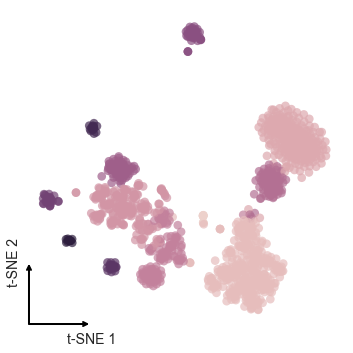

CPU times: user 15 s, sys: 84.9 ms, total: 15.1 s
Wall time: 15 s


In [63]:
%%time
retina_tSNE = fcc_tSNE(matrix=retina_PCA100.results, perplexity=30, seed=18)
retina_tSNE.plot(color=retina_clu)

In [77]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Opn1mw$')].flatten(), save_to='../images/retina_clu_Opn1mw.png', figsize=(6,6))

In [78]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Rlbp1$')].flatten(), save_to='../images/retina_clu_Rlbp1.png', figsize=(6,6))

In [79]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Vsx2$')].flatten(), save_to='../images/retina_clu_Vsx2.png', figsize=(6,6))

In [80]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Pax6$')].flatten(), save_to='../images/retina_clu_Pax6.png', figsize=(6,6))

In [83]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Lhx1$')].flatten(), save_to='../images/retina_clu_Lhx1.png', figsize=(6,6))

In [84]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Slc17a6$')].flatten(), save_to='../images/retina_clu_Slc17a6.png', figsize=(6,6))

In [85]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Gad1$')].flatten(), save_to='../images/retina_clu_Gad1.png', figsize=(6,6))

In [86]:
retina_tSNE.plot(color=retina.arcsinh_norm()[:,retina.gene_IDs.str.contains('Rho$')].flatten(), save_to='../images/retina_clu_Rho.png', figsize=(6,6))

In [87]:
retina_tSNE.plot(color=retina.arcsinh_norm().sum(axis=1), save_to='../images/retina_clu_UMI.png', figsize=(6,6))

---
Same thing for colon dataset now

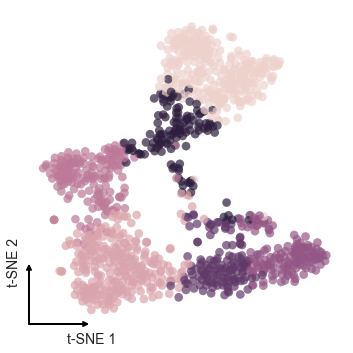

CPU times: user 12.5 s, sys: 75.3 ms, total: 12.6 s
Wall time: 12.5 s


In [64]:
%%time
colon_tSNE = fcc_tSNE(matrix=colon_PCA100.results, perplexity=30, seed=18)
colon_tSNE.plot(color=colon_clu)

In [88]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Muc2'].flatten(), save_to='../images/colon_clu_Muc2.png', figsize=(6,6))

In [89]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Krt20'].flatten(), save_to='../images/colon_clu_Krt20.png', figsize=(6,6))

In [90]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Reg4'].flatten(), save_to='../images/colon_clu_Reg4.png', figsize=(6,6))

In [91]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Clca1'].flatten(), save_to='../images/colon_clu_Clca1.png', figsize=(6,6))

In [94]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Lrig1'].flatten(), save_to='../images/colon_clu_Lrig1.png', figsize=(6,6))

In [92]:
colon_tSNE.plot(color=colon.arcsinh_norm()[:,colon.gene_IDs=='Myc'].flatten(), save_to='../images/colon_clu_Myc.png', figsize=(6,6))

In [93]:
colon_tSNE.plot(color=colon.arcsinh_norm().sum(axis=1), save_to='../images/colon_clu_UMI.png', figsize=(6,6))

---
### Write results to file

In [95]:
# save tSNE results to file
np.savetxt(X=retina_tSNE.results, fname='pymethods_out/retina_clu_tSNE.csv', delimiter=',')
np.savetxt(X=colon_tSNE.results, fname='pymethods_out/colon_clu_tSNE.csv', delimiter=',')

In [96]:
# save cluster IDs to file
np.savetxt(X=retina_clu, fname='pymethods_out/retina_clu.csv', delimiter=',')
np.savetxt(X=colon_clu, fname='pymethods_out/colon_clu.csv', delimiter=',')

---
### Read in results and plot as barcodes

In [97]:
retina_clu_tSNE = DR.from_file('pymethods_out/retina_clu_tSNE.csv', name='t-SNE', barcodefile='pymethods_out/retina_clu.csv')
colon_clu_tSNE = DR.from_file('pymethods_out/colon_clu_tSNE.csv', name='t-SNE', barcodefile='pymethods_out/colon_clu.csv')

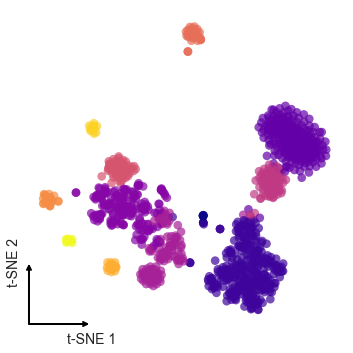

In [98]:
retina_clu_tSNE.plot_barcodes()

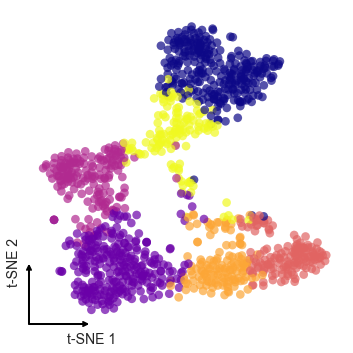

In [99]:
colon_clu_tSNE.plot_barcodes()

In [100]:
colon_clu_tSNE.plot_barcodes(save_to='../images/colon_clu_barcodes.png', figsize=(6,6))

In [101]:
retina_clu_tSNE.plot_barcodes(save_to='../images/retina_clu_barcodes.png', figsize=(6,6))